## Pokémon

Il dataset (https://www.kaggle.com/datasets/maca11/all-pokemon-dataset) riporta l'elenco di tutti i Pokémon delle prime 8 generazioni. 

Per ogni pokémon il dataset contiene i seguenti campi:
<ul>
    <li>Numero di Pokédex</li>
    <li>Nome</li>
    <li>Tipo primario</li>
    <li>Tipo secondario</li>
    <li>Possibili abilità</li>
    <li>HP</li>
    <li>ATT</li>
    <li>DEF</li>
    <li>SP ATT</li>
    <li>SP DEF</li>
    <li>SPE</li>
    <li>BST</li>
    <li>Generazione</li>
    <li>Tasso di allevamento</li>
    <li>Esperienza per il livello 100</li>
    <li>È l'ultima evoluzione?</li>
    <li>Tasso di cattura</li>
    <li>È leggendario?</li>
    <li>È una mega evoluzione?</li>
    <li>È una forma di Alola?</li>
    <li>È una forma di Galar?</li>
    <li>Efficacia dei tipi contro il pokémon</li>
    <li>Altezza</li>
    <li>Peso</li>
    <li>BMI</li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dataset = pd.read_csv("dataset/Pokemon_dataset.csv").astype({"Generation" : int, "Final Evolution": int, "Legendary": int})
dataset

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,896,Glastrier,Ice,NaN,['Chilling Neigh'],100,145,130,65,110,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.2,800.0,165.3
1028,897,Spectrier,Ghost,NaN,['Grim Neigh'],100,65,60,145,80,...,0.5,1.0,2.0,1.0,2.0,1.0,1.0,2.0,44.5,11.1
1029,898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,...,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.1,7.7,6.4
1030,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.4,809.1,140.5


Decidiamo di non considerare i campi 'Numero di Pokédex', 'Possibili abilità', 'Tasso di allevamento', 'Esperienza per il livello 100', 'È una mega evoluzione', 'È una forma di Alola?', 'È una forma di Galar?' e 'BMI' perché sono irrilevanti al fine della nostra indagine.

In [2]:
dataset = dataset.drop(labels=['Number', 'Abilities', 'Mean', 'Standard Deviation', 'Experience type', 'Experience to level 100', 'Mega Evolution', 'Alolan Form', 'Galarian Form', 'BMI'], axis=1)
dataset

,Name,Type 1,Type 2,HP,Att,Def,Spa,Spd,Spe,BST,...,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0
2,Venusaur,Grass,Poison,80,82,83,100,100,80,525,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,625,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5
4,Charmander,Fire,NaN,39,52,43,60,50,65,309,...,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Glastrier,Ice,NaN,100,145,130,65,110,30,580,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.2,800.0
1028,Spectrier,Ghost,NaN,100,65,60,145,80,130,580,...,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0,2.0,44.5
1029,Calyrex,Psychic,Grass,100,80,80,80,80,80,500,...,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.1,7.7
1030,Calyrex Ice Rider,Psychic,Ice,100,165,150,85,130,50,680,...,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.4,809.1


In totale esistono 1032 pokémon (considerando forme diverse dello stesso pokémon come pokémon diversi).

Iniziamo dall'analizzare quanti pokémon sono stati introdotti in ogni generazione:

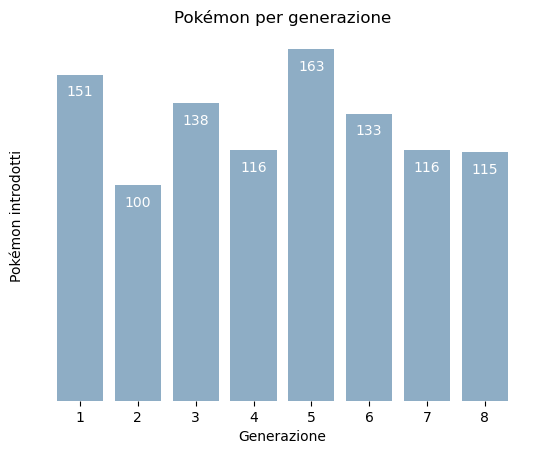

In [3]:
def pokemonByGenerationLabels(x,y):
    for i in x:
        plt.text(i, y[i] - 10, y[i], ha = 'center', color='white')

x_axis = dataset['Generation'].unique()
x_axis.sort()
y_axis = dataset.groupby(['Generation']).count()['Name']

plt.bar(x_axis, y_axis, color='#8eadc5')
plt.title("Pokémon per generazione")
plt.xlabel("Generazione")
plt.ylabel("Pokémon introdotti")
plt.yticks([])

plt.gca().set_frame_on(False)
pokemonByGenerationLabels(x_axis, y_axis)

plt.show()

Notiamo come nella prima e quinta generazione sono stati aggiunti molti pokemon, mentre in altre generazioni un pò meno. La generazione che ne ha introdotti di meno è stata la seconda.

Analizziamo, invece, quanti pokémon esistono per ogni tipo:

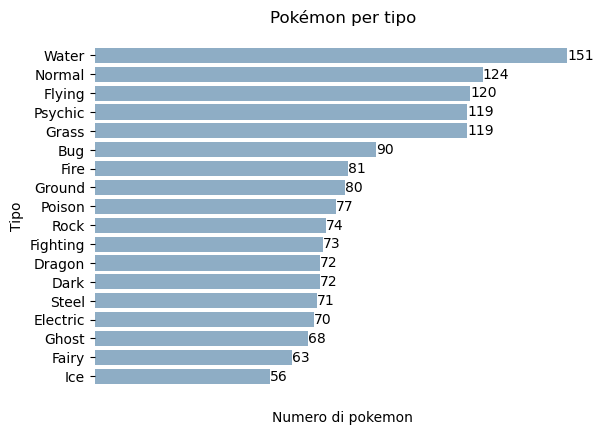

In [4]:
types = dataset['Type 1'].unique()

number_per_types = []
for t in types:
    number_per_types.append(len(dataset[(dataset['Type 1'] == t) | (dataset['Type 2'] == t)]))

type_series = pd.Series(index=types, data=number_per_types).sort_values(ascending=True)
x_axis = type_series.values
y_axis = type_series.index


bars = plt.barh(y_axis, x_axis, color='#8eadc5')
plt.title("Pokémon per tipo")
plt.ylabel("Tipo")
plt.xlabel("Numero di pokemon")
plt.xticks([])
plt.gca().set_frame_on(False)
plt.bar_label(bars)
plt.show()

Notiamo come i pokémon di tipo Acqua sono molto più degli altri, la distribuzione non è così omogenea, inoltre i pokemon del tipo prevalente sono quasi il triplo di quelli del tipo meno prevalente.

Vediamo quanti pokémon hanno un'evoluzione e quanti sono allo stadio finale oppure quanti pokemon sono leggendari e quanti no:

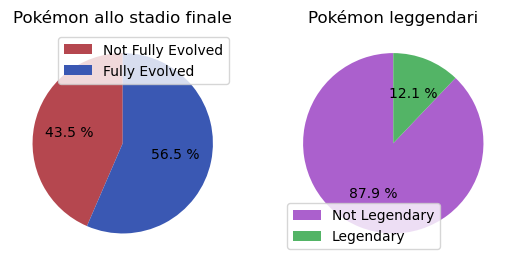

In [5]:
plt.subplot(1, 2, 1)

x_axis = ["Not Fully Evolved", "Fully Evolved"]
y_axis = dataset.groupby(['Final Evolution']).count()['Name']

plt.pie(y_axis, colors = ['#B5474F', '#3A58B3'], autopct="%.1f %%", startangle=90)
plt.title("Pokémon allo stadio finale")
plt.legend(labels=x_axis)

plt.subplot(1, 2, 2)
x_axis = ["Not Legendary", "Legendary"]
y_axis = dataset.groupby(['Legendary']).count()['Name']

plt.pie(y_axis, colors = ['#AB60CD', '#53B466'], autopct="%.1f %%", startangle=90)
plt.title("Pokémon leggendari")
plt.legend(labels=x_axis)
plt.show()

plt.show()

Notiamo che ci sono più pokèmon allo stadio finale rispetto a quelli non completamente evoluti, anche se non è enorme la differenza. D'altro canto sono molti di più i pokémon non leggendari rispetto ai leggendari. Questo ci fa pensare che i pokemon leggendari possano essere "rari".

Ipotizziamo che i leggendari siano più difficili da catturare rispetto ai non leggendari.

Verifichiamo.

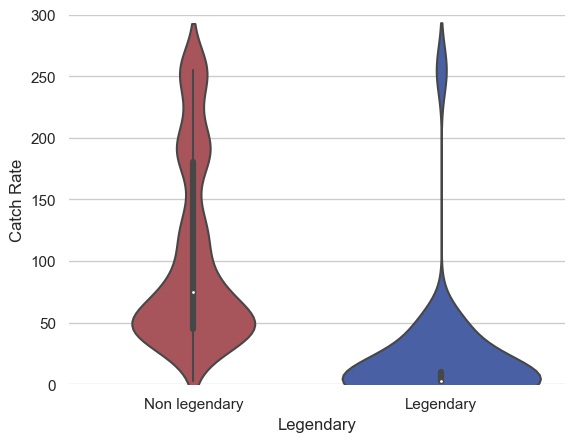

In [25]:
fig, axes = plt.subplots()

my_pal = {0: '#B5474F', 1: '#3A58B3'}
ax = sns.violinplot(data=dataset, x='Legendary', y='Catch Rate', palette=my_pal)
ax.set_xticklabels(['Non legendary', 'Legendary'])
plt.gca().set_frame_on(False)
plt.ylim([0,300])
plt.show()

L'ipotesi sembra già confermata, ma proviamo a considerare una visualizzazione differente

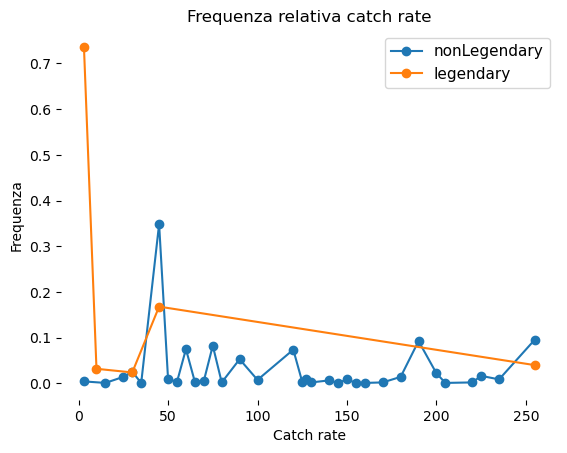

In [7]:
nonLegendary = dataset[dataset['Legendary'] == 0]
legendary = dataset[dataset['Legendary'] == 1]

nl = nonLegendary.groupby(['Catch Rate'])
l = legendary.groupby(['Catch Rate'])

x_nl = nl.groups.keys()
x_l = l.groups.keys()

y_nl = []
y_l = []

for g in x_nl:
    y_nl.append(nl.get_group(g)['Name'].count() / len(nonLegendary))

for g in x_l:
    y_l.append(l.get_group(g)['Name'].count() / len(legendary))

plt.plot(x_nl,y_nl, marker='o', label='nonLegendary')
plt.plot(x_l,y_l, marker='o', label='legendary')
plt.xlabel('Catch rate')
plt.ylabel('Frequenza')
plt.legend(fontsize=11)
plt.gca().set_frame_on(False)
plt.grid(False)
plt.title('Frequenza relativa catch rate')
plt.show()

Come si nota dai grafici (normalizzati), pokemon leggendari con basso catch rate sono molti di più di quelli non leggendari, viceversa ci sono più pokemon non leggendari con catch rate alto rispetto ai leggendari.

Vediamo le distribuzioni delle statistiche.

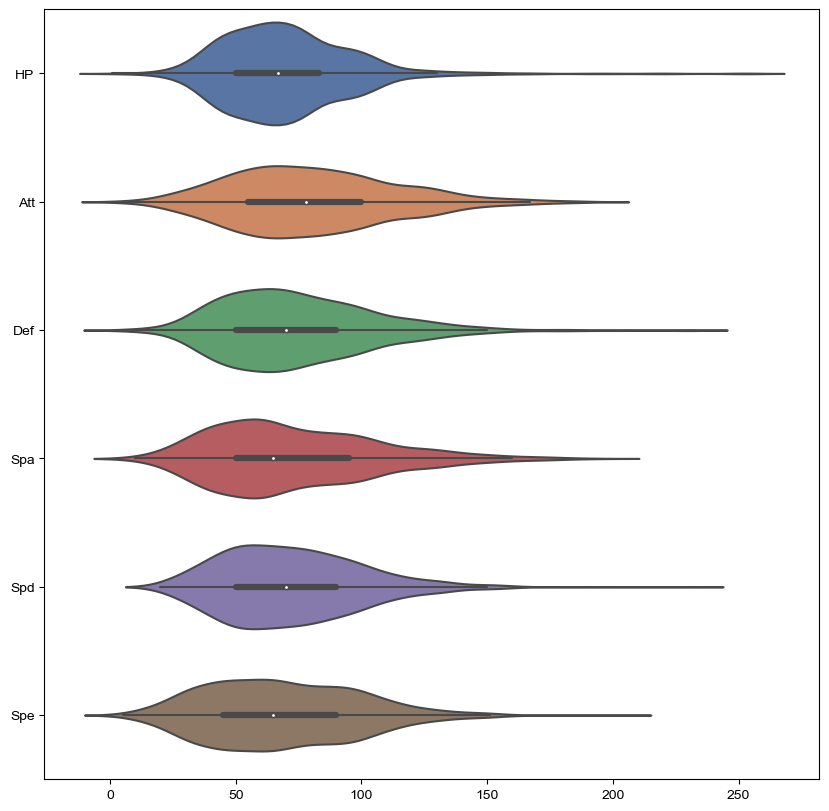

In [8]:
fig, axes = plt.subplots(figsize=(10,10))
sns.set(style="whitegrid")
sns.violinplot(data=dataset[["HP","Att","Def","Spa","Spd","Spe"]], ax = axes, orient ='h')
plt.grid(False)
#plt.gca().set_frame_on(False)
plt.show()

Abbiamo visto che ci sono due classificazioni principali di pokemon:
<ul>
    <li>Completamente evoluto/non completamente evoluto</li>
    <li>Leggendari/non leggendary</li>
</ul>

Dopo aver analizzato il catch rate per la seconda tipologia di classificazione, analizziamo le differenze di statistiche complessive di base.

Partiamo con la differenza tra pokemon completamente evoluti e non completamente evoluti:

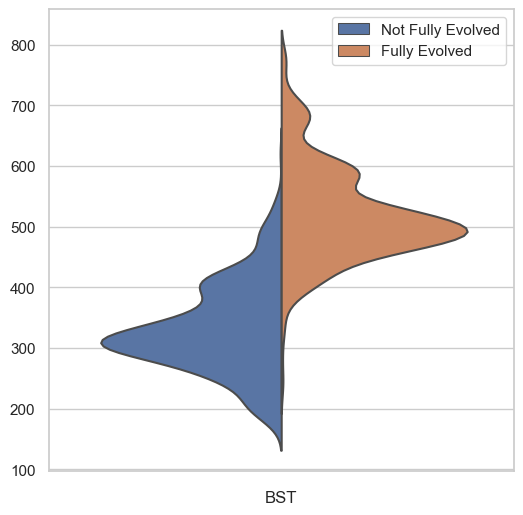

In [9]:
d = dataset
d["all"] = ""

plt.figure(figsize=(6,6))
ax = sns.violinplot(x='all', y='BST', hue='Final Evolution', data=d, split=True, inner=None)
ax.legend(handles=ax.legend_.legendHandles, labels=['Not Fully Evolved', 'Fully Evolved'], loc='upper right')
plt.xlabel("BST")
plt.ylabel("")
plt.show()

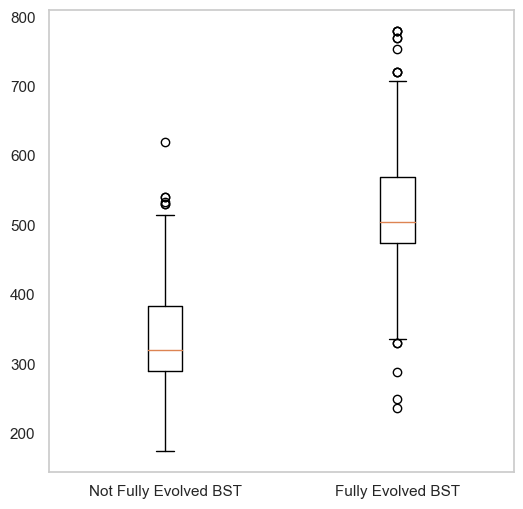

In [10]:
fullyEvolved = dataset[dataset['Final Evolution'] == 1]
notFullyEvolved = dataset[dataset['Final Evolution'] == 0]

plt.figure(figsize=(6,6))
plt.boxplot([notFullyEvolved['BST'], fullyEvolved['BST']], labels=["Not Fully Evolved BST", "Fully Evolved BST"])
plt.grid(False)

plt.show()

Come si può notare, i pokemon completamente evoluti ...

Ora analizziamo ... considerando solo evoluzioni finali

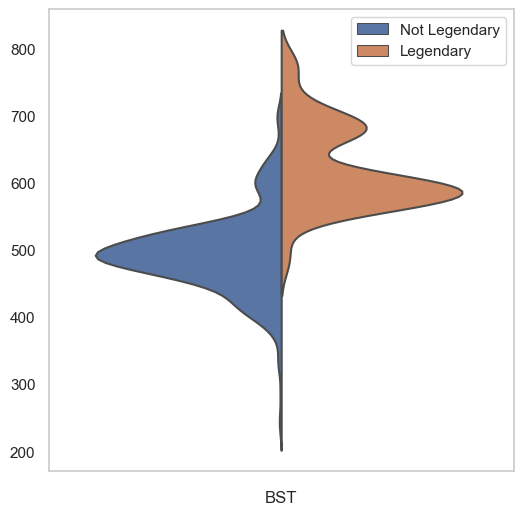

In [11]:
d = dataset
d["all"] = ""

plt.figure(figsize=(6,6))
d=d[d['Final Evolution'] == 1]
ax = sns.violinplot(x='all', y='BST', hue='Legendary', data=d, split=True, inner=None)
ax.legend(handles=ax.legend_.legendHandles, labels=['Not Legendary', 'Legendary'])
plt.xlabel("BST")
plt.ylabel("")
plt.grid(False)
plt.show()

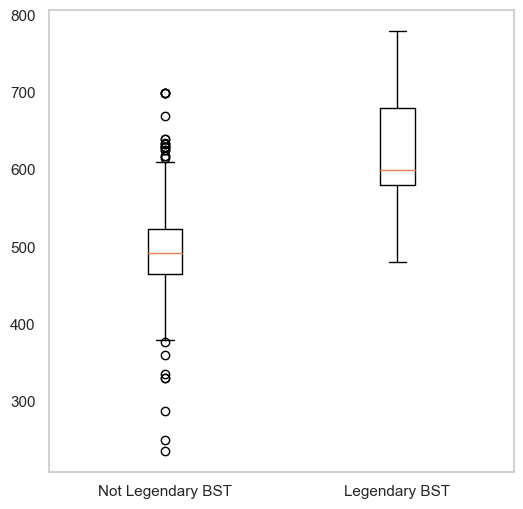

In [12]:
legendary = d[d['Legendary'] == 1]
notLegendary = d[d['Legendary'] == 0]

plt.figure(figsize=(6,6))
plt.boxplot([notLegendary['BST'], legendary['BST']], labels=["Not Legendary BST", "Legendary BST"])
plt.grid(False)

plt.show()

Distribuzione pesi e altezze

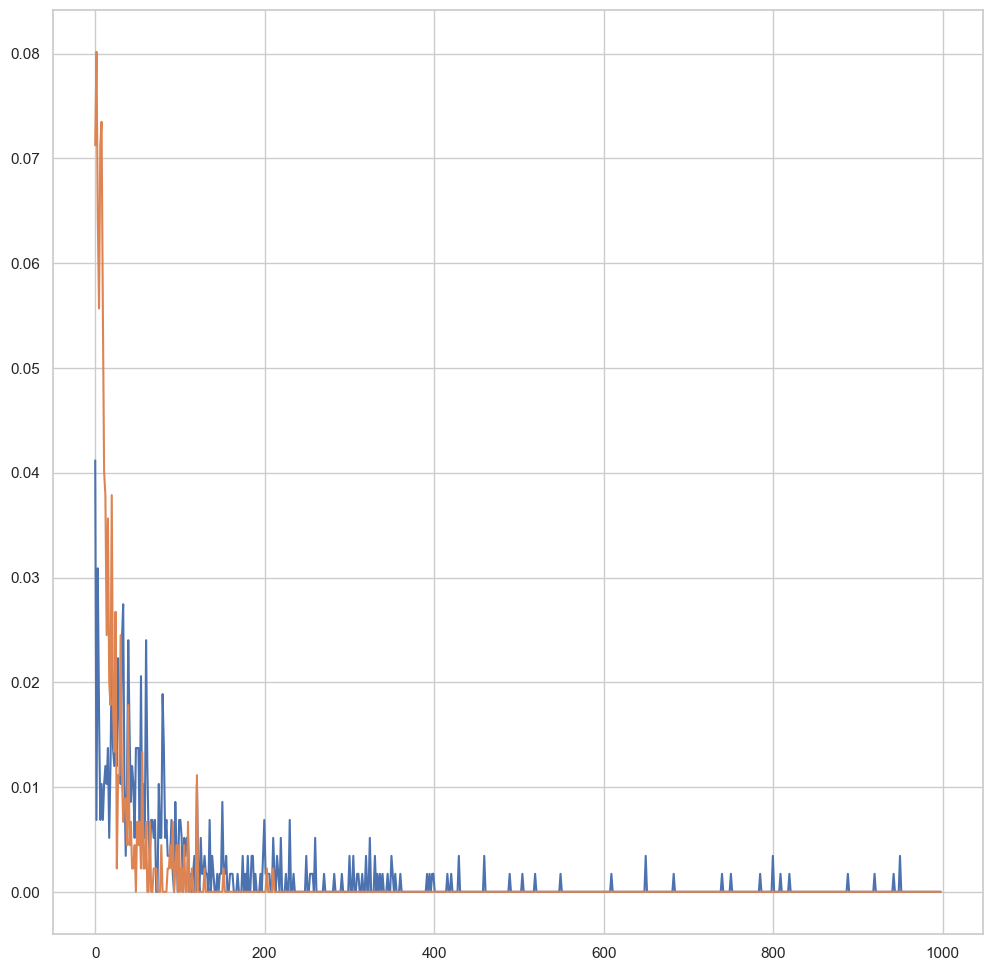

In [13]:
feWeights = dataset[dataset['Final Evolution'] == 1]['Weight']
nfeWeights = dataset[dataset['Final Evolution'] == 0]['Weight']

x = np.arange(0, 999, 1.5)

y1 = []
y2 = []

for i in x:
        y1.append(feWeights[(feWeights >= i) & (feWeights < i + 1.5)].count() / len(feWeights))
        y2.append(nfeWeights[(nfeWeights >= i) & (nfeWeights < i + 1.5)].count() / len(nfeWeights))
    
plt.figure(figsize=(12,12))
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

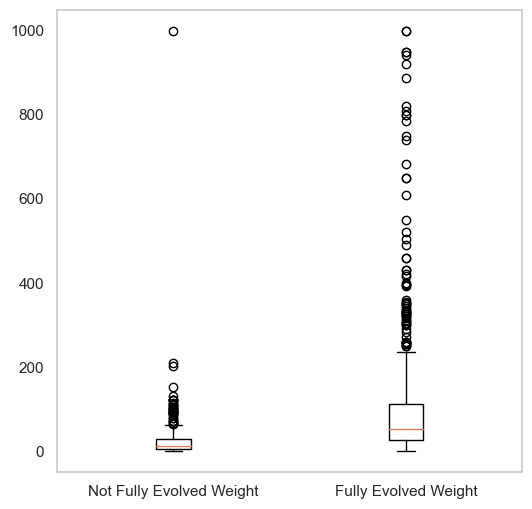

In [14]:
plt.figure(figsize=(6,6))
plt.boxplot([nfeWeights, feWeights], labels=["Not Fully Evolved Weight", "Fully Evolved Weight"])
plt.grid(False)

plt.show()

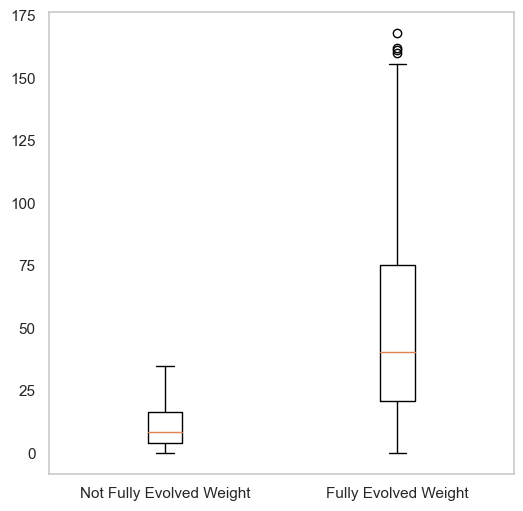

In [15]:
plt.figure(figsize=(6,6))
plt.boxplot([nfeWeights[nfeWeights < nfeWeights.quantile(q=0.825)], feWeights[feWeights < feWeights.quantile(q=0.825)]], labels=["Not Fully Evolved Weight", "Fully Evolved Weight"])
plt.grid(False)

plt.show() 

Altezze

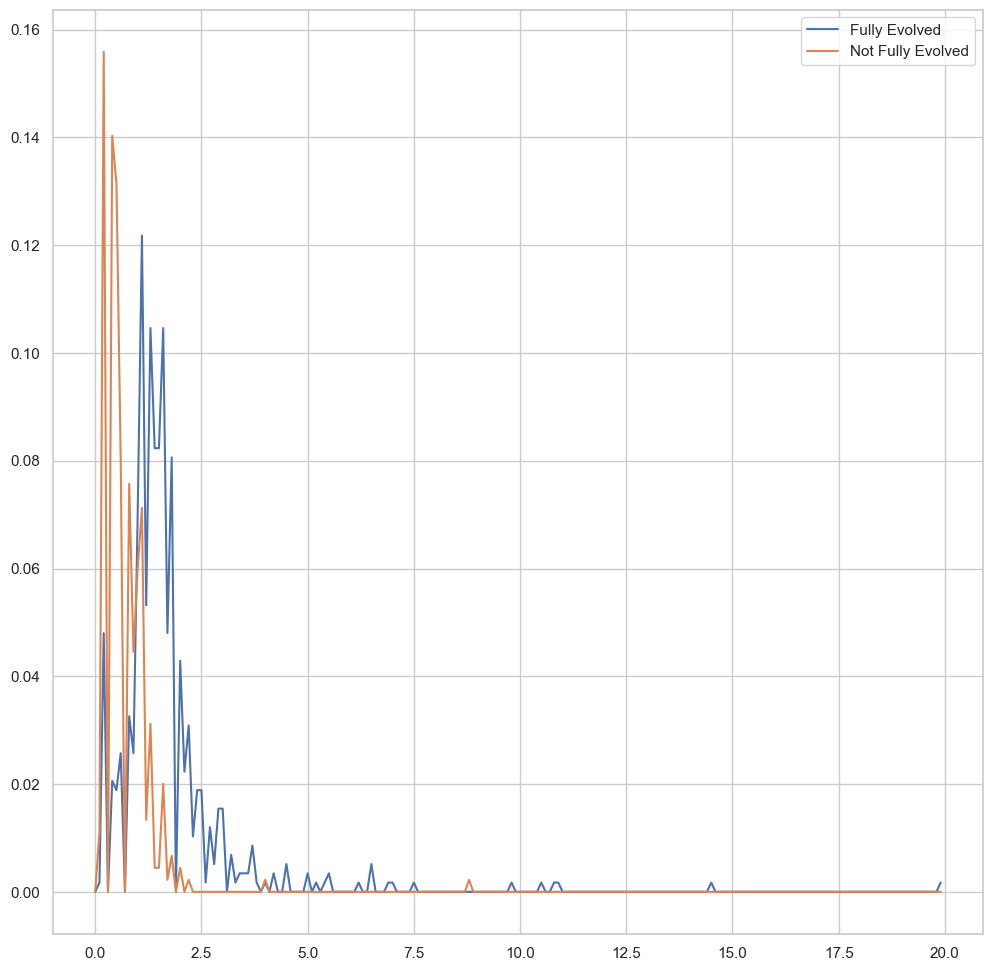

In [16]:
feHeights = dataset[dataset['Final Evolution'] == 1]['Height']
nfeHeights = dataset[dataset['Final Evolution'] == 0]['Height']

x = np.arange(0, 20, 0.1)

y1 = []
y2 = []

for i in x:
        y1.append(feHeights[(feHeights >= i) & (feHeights < i + 0.1)].count() / len(feHeights))
        y2.append(nfeHeights[(nfeHeights >= i) & (nfeHeights < i + 0.1)].count() / len(nfeHeights))
    
plt.figure(figsize=(12,12))
plt.plot(x, y1, label='Fully Evolved')
plt.plot(x, y2, label='Not Fully Evolved')
plt.legend(fontsize=11)
plt.show()

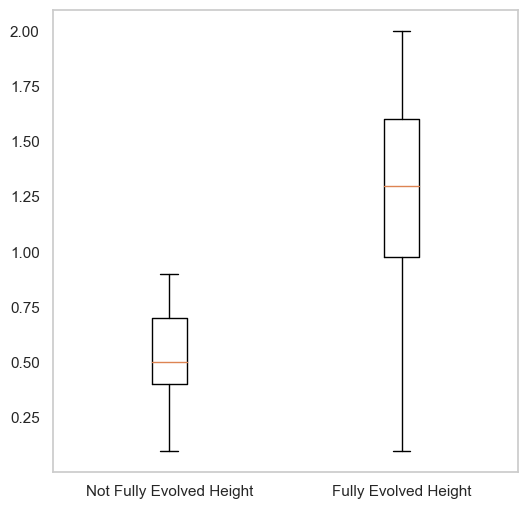

In [17]:
plt.figure(figsize=(6,6))
plt.boxplot([nfeHeights[nfeHeights < nfeHeights.quantile(q=0.825)], feHeights[feHeights < feHeights.quantile(q=0.825)]], labels=["Not Fully Evolved Height", "Fully Evolved Height"])
plt.grid(False)

plt.show() 

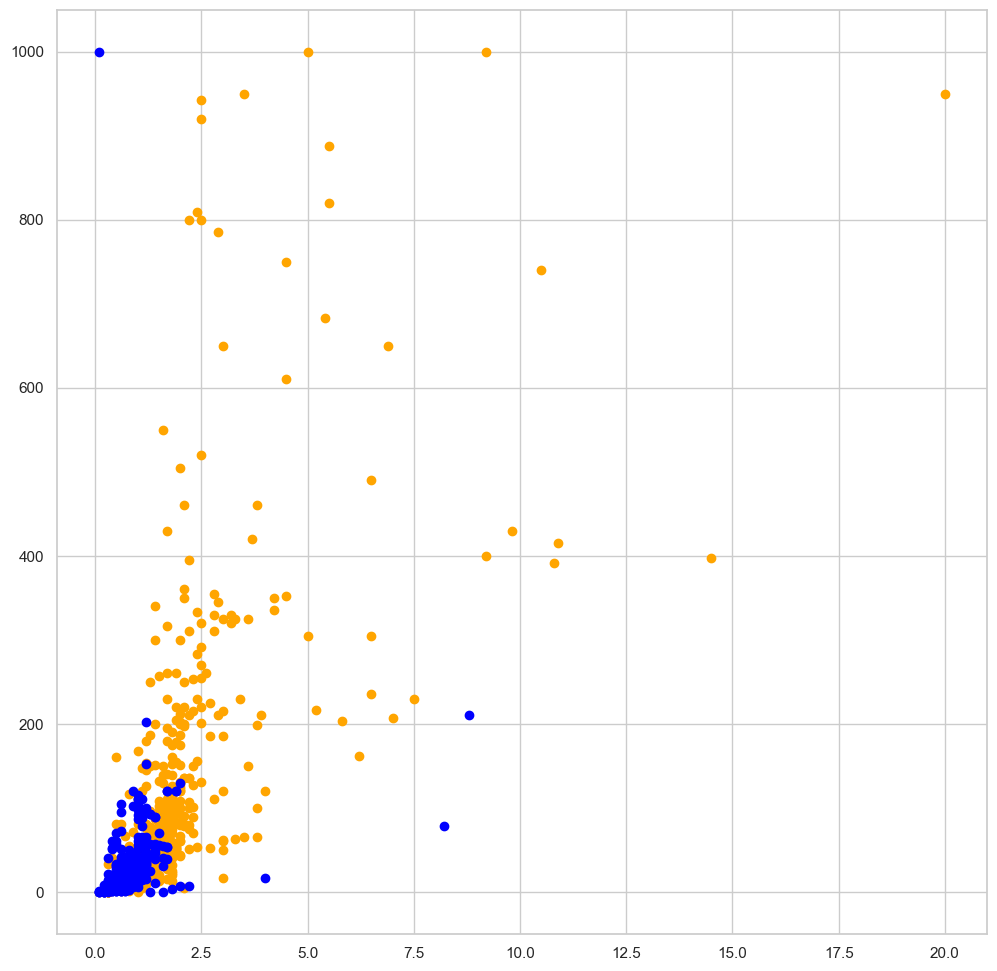

In [18]:
plt.figure(figsize=(12,12))
plt.scatter(fullyEvolved['Height'], fullyEvolved['Weight'], color='orange')
plt.scatter(notFullyEvolved['Height'], notFullyEvolved['Weight'], color='blue')
plt.show()

In [19]:
def amountMultiplier(x, mul):
    k = 0
    if (x['Against Normal'] == mul):
        k += 1
    if (x['Against Fire'] == mul):
        k += 1
    if (x['Against Water'] == mul):
        k += 1
    if (x['Against Electric'] == mul):
        k += 1
    if (x['Against Grass'] == mul):
        k += 1
    if (x['Against Ice'] == mul):
        k += 1
    if (x['Against Fighting'] == mul):
        k += 1
    if (x['Against Poison'] == mul):
        k += 1
    if (x['Against Ground'] == mul):
        k += 1
    if (x['Against Flying'] == mul):
        k += 1
    if (x['Against Psychic'] == mul):
        k += 1
    if (x['Against Bug'] == mul):
        k += 1
    if (x['Against Rock'] == mul):
        k += 1
    if (x['Against Ghost'] == mul):
        k += 1
    if (x['Against Dragon'] == mul):
        k += 1
    if (x['Against Dark'] == mul):
        k += 1
    if (x['Against Steel'] == mul):
        k += 1
    if (x['Against Fairy'] == mul):
        k += 1
    return k

def generateValues(mul):
    values = []
    for i in counter:
        c = 0
        for index, row in dataset.iterrows():
            if (amountMultiplier(row, mul) == i):
                c += 1
        values.append(c/len(dataset))
    return values

counter = range(0,18)
immunities = generateValues(0)
superWeak = generateValues(0.25)
weak = generateValues(0.5)
neutral = generateValues(1)
superEffective = generateValues(2)
ultraEffective = generateValues(4)

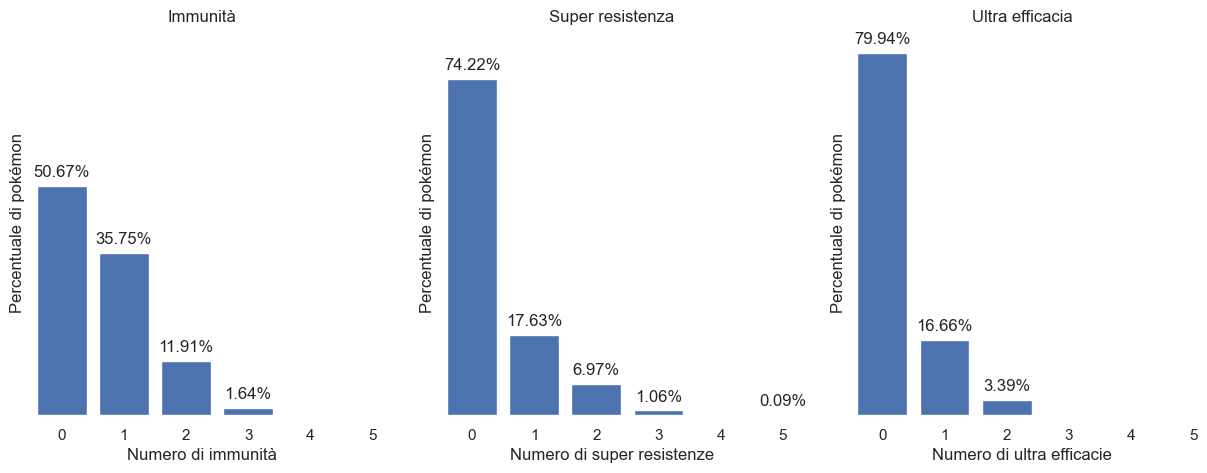

In [20]:
def ceil(x):
    return int(x*100)/100

def addlabels3(x,y):
    for i in x:
        if (ceil(y[i] * 100)> 0):
            plt.text(i, y[i] + 0.02, str(ceil(y[i] * 100)) + '%', ha = 'center')
              

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.bar(counter, immunities)
plt.xlim(-0.5,5)
plt.ylim(0, 0.85)
plt.xlabel('Numero di immunità')
plt.ylabel('Percentuale di pokémon')
plt.title('Immunità')
plt.yticks([])
plt.gca().set_frame_on(False)
plt.grid(False)
addlabels3(counter[0:6], immunities)

plt.subplot(1,3,2)
plt.bar(counter, superWeak)
plt.xlim(-0.5,5)
plt.ylim(0, 0.85)
plt.xlabel('Numero di super resistenze')
plt.ylabel('Percentuale di pokémon')
plt.title('Super resistenza')
plt.yticks([])
plt.gca().set_frame_on(False)
plt.grid(False)
addlabels3(counter[0:6], superWeak)

plt.subplot(1,3,3)
plt.bar(counter, ultraEffective)
plt.xlim(-0.5,5)
plt.ylim(0, 0.85)
plt.xlabel('Numero di ultra efficacie')
plt.ylabel('Percentuale di pokémon')
plt.title('Ultra efficacia')
plt.yticks([])
plt.gca().set_frame_on(False)
plt.grid(False)
addlabels3(counter[0:6], ultraEffective)

plt.show()

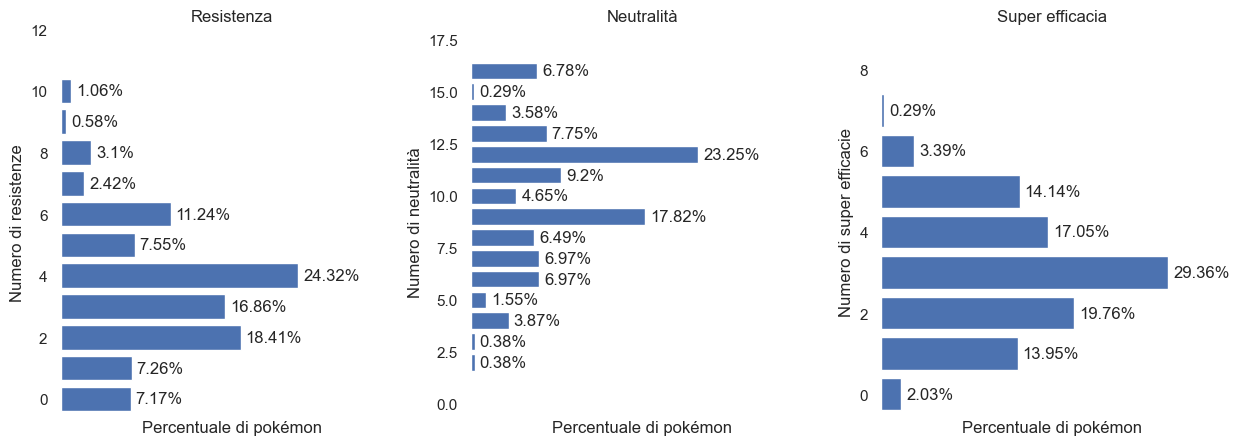

In [21]:
def addLabels4(values):
    for i, v in enumerate(values):
        if (v > 0):
            plt.text(v + 0.005, i, str(ceil(v * 100)) + '%', va='center')

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
bars = plt.barh(counter, weak)
plt.ylim(-0.5,12)
plt.xlim(0, 0.35)
plt.xlabel('Percentuale di pokémon')
plt.ylabel('Numero di resistenze')
plt.title('Resistenza')
plt.xticks([])
plt.gca().set_frame_on(False)
plt.grid(False)
addLabels4(weak)

plt.subplot(1,3,2)
bars = plt.barh(counter, neutral)
plt.ylim(-0.5,18)
plt.xlim(0, 0.35)
plt.ylabel('Numero di neutralità')
plt.xlabel('Percentuale di pokémon')
plt.title('Neutralità')
plt.xticks([])
plt.gca().set_frame_on(False)
plt.grid(False)
addLabels4(neutral)

plt.subplot(1,3,3)
bars = plt.barh(counter, superEffective)
plt.ylim(-0.5,9)
plt.xlim(0, 0.35)
plt.ylabel('Numero di super efficacie')
plt.xlabel('Percentuale di pokémon')
plt.title('Super efficacia')
plt.xticks([])
plt.gca().set_frame_on(False)
plt.grid(False)
addLabels4(superEffective)

plt.show()